In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = ds.load_iris()

In [3]:
df_iris = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
dfT = df_iris.copy()
dfT['target'] = iris['target']

In [6]:
def set_tipo(codigo_tipo):
    if codigo_tipo == 0:
        return iris['target_names'][0]
    elif codigo_tipo == 1:
        return iris['target_names'][1]
    elif codigo_tipo == 2:
        return iris['target_names'][2]

In [7]:
dfT['target_name'] = dfT['target'].apply(set_tipo)

In [8]:
dfT.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dfT[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], 
    dfT['target'], test_size = 0.3, random_state=4)

In [10]:
tree_kwargs = {
    'criterion': 'entropy',
    'splitter': 'best',
    'min_samples_split': 2,

}

clf = DecisionTreeClassifier(**tree_kwargs)

In [11]:
model = clf.fit(X=X_treino, y=y_treino)

In [12]:
y_pred = model.predict(X_teste)

In [13]:
accuracy_score(y_teste, y_pred)

0.9777777777777777

In [14]:
df_resultados = df_iris.copy()
df_resultados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df_resultados['target_pred'] = clf.predict(df_resultados)

In [16]:
df_resultados['target_name_pred'] = df_resultados['target_pred'].apply(set_tipo)

In [17]:
df_resultados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_pred,target_name_pred
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


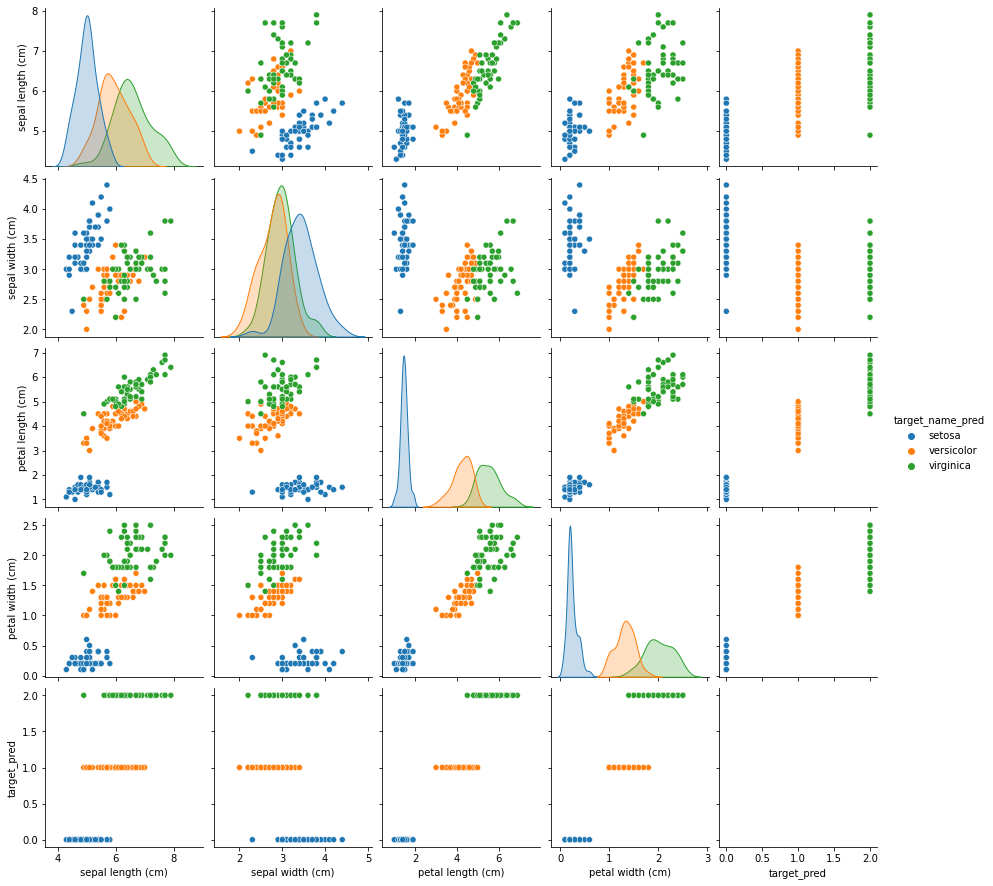

In [18]:
sns.pairplot(data=df_resultados, hue='target_name_pred')

C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


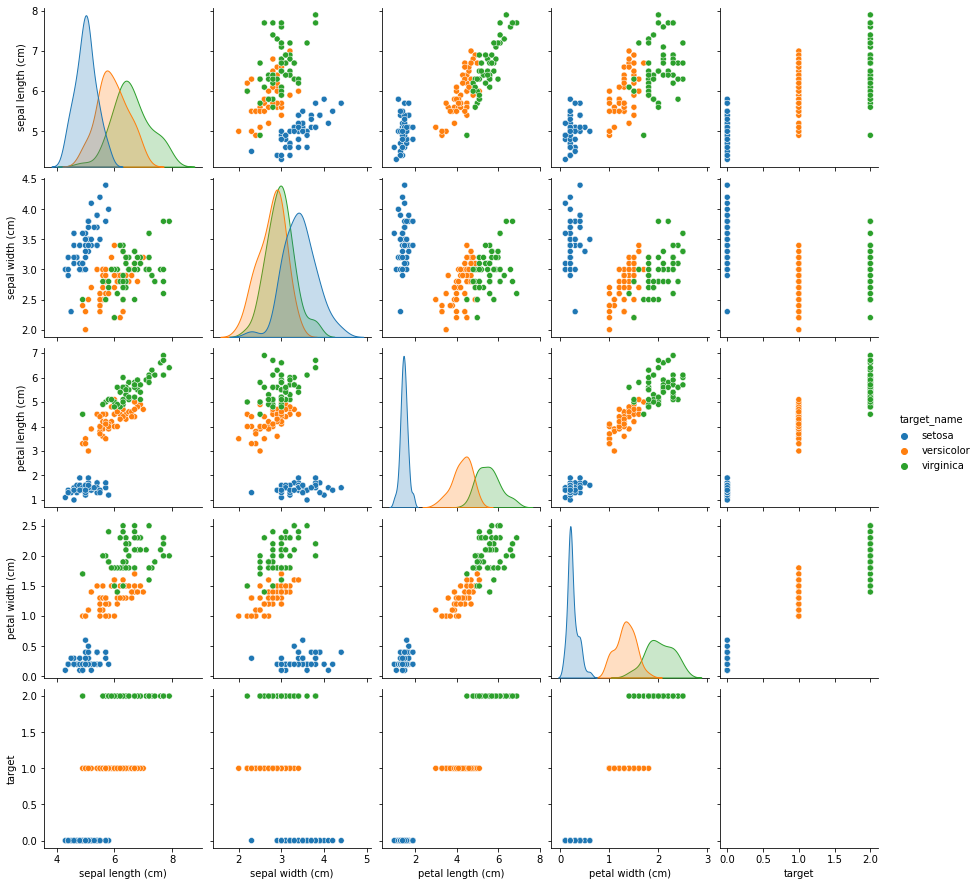

In [19]:
sns.pairplot(data=dfT, hue='target_name')

Text(0.5, 1.0, 'b) Rótulos previstos.')

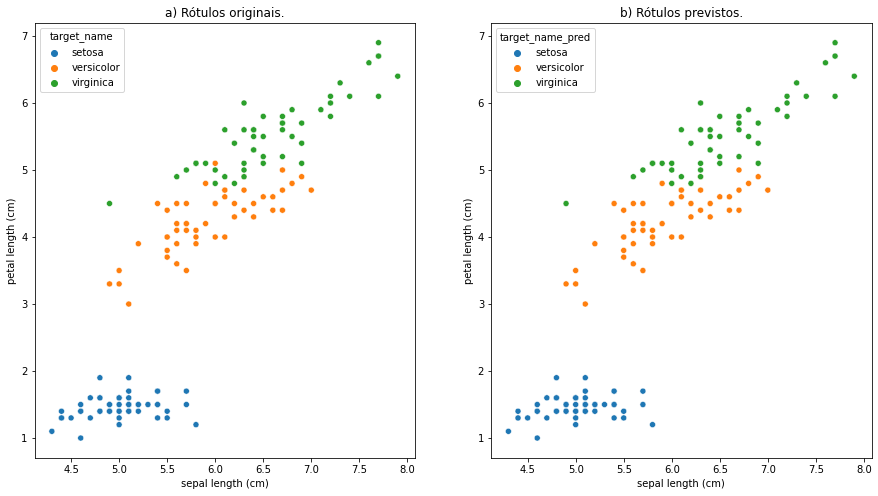

In [21]:
# Gráficos de distribuição dos dados originais e previstos
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(x = dfT['sepal length (cm)'], y = dfT['petal length (cm)'], hue = dfT['target_name'], ax = axes[0])
sns.scatterplot(x = df_resultados['sepal length (cm)'], y = df_resultados['petal length (cm)'], hue = df_resultados['target_name_pred'], ax = axes[1])
axes[0].set_title('a) Rótulos originais.')
axes[1].set_title('b) Rótulos previstos.')

In [22]:
cm = confusion_matrix(dfT['target_name'], df_resultados['target_name_pred'])
df_cm = pd.DataFrame(cm, index=('Real = ' + pd.DataFrame(iris.target_names)[0]), 
    columns=('Prev = ' + pd.DataFrame(iris.target_names)[0]))
df_cm.head()

,Prev = setosa,Prev = versicolor,Prev = virginica
0,,,
Real = setosa,50,0,0
Real = versicolor,0,49,1
Real = virginica,0,0,50


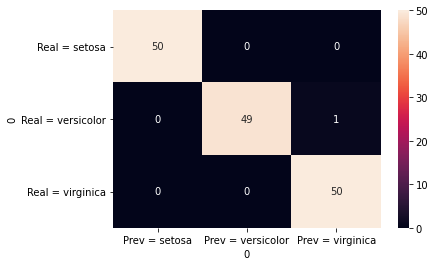

In [23]:
sns.heatmap(df_cm, annot=True)
plt.show()

In [24]:
accuracy_score(dfT['target_name'], df_resultados['target_name_pred'])

0.9933333333333333